## **Final Project Report**

**Contributors:**

    Sriram Chunduri

    Divya Sree Kuntamalla

    Parimala Gutta

    Deepak Kandikattu

    Srikar Reddy Nelavetla



**Webpage Link:** https://sriram333.github.io/DS-as-a-field-final-report---Kroger-data-analysis/






### **Description of the Statement of Interest:**

Using Kroger Store's Data from API and collected data from 2500 Households,

How can we identify the campaigns that are reaching the most households and generating the highest sales?

**This problem statement is motivated by the following observations:**

There is a lot of variation in the reach of marketing campaigns and sales generated by campaigns, with some campaigns reaching many more households and generating much more sales than others.

The data on campaigns, household ID, Campaign ID, and the number of households to which different campaigns are reached, number of redeems for campaigns, and sales values can be used to identify the campaigns that are reaching the most households and generating the highest sales.

By solving this problem, we can help businesses to identify the most effective marketing campaigns and allocate their resources accordingly. This could lead to increased sales and profitability for businesses.

**Here are some specific questions that could be addressed using the data:**

Which demographic factors affect customer enegagement?

How many customers are spending more or less over time?

Which campaigns are reaching the most households?

Which campaigns are most efficient at generating sales per household reached based on coupon redemptions?


By answering these questions, we can develop a better understanding of how to create marketing campaigns that reach a large number of households and generate high sales.



### **Data sources:**

**Kroger API:**

**Steps to get the api keys and id:**

Link: https://developer.kroger.com/documentation/public/getting-started/quick-start


**Authorization Endpoints:**

1. Get an Authorization Code

2. Get an Access Token

    Link: https://developer.kroger.com/reference#tag/OAuth2



The following APIs are publicly available to allow new clients to build products, services, or customer experiences that leverage the unique data, functions, and applications of Kroger. 

1. **Location API:** The Locations API provides access to all locations, chains, and departments that are owned by The Kroger Co.

    Link: https://developer.kroger.com/reference#tag/Locations


2. **Products API:** The Products API allows you to search the Kroger product catalog.

    Link: https://developer.kroger.com/reference#tag/Products





#### **Installing customerjourney-py package**


The dataset consist of eight tables in customerjourney-py package, we will go through six of them which we will use in this notebook. The dataset covers a year span purchase transactions of 2500 households of kroger retail super market. Also demographics information of households, campaign and coupon redemption informations are available. 

**Campaign Descriptions:** Campaign description data is a look up table, containing the start and the end days of each campaign (30 campaigns in total). Also it gives which campaign belongs to what category (Type A, B and C).

**Campaigns:** Campaign dataset contains identifying information for the marketing campaigns each household participated in.

**Coupons:** Is a lookup table which lists all the coupons sent to customers as part of a campaign, as well as the products for which each coupon is redeemable

**Coupon Redemptions:** Is a data table, ordered by household_id, gives which household redeemed what coupon number. Also the day of the redeem and the campaign number is given for each household.

**Transactions:** Transactional data contains purchase history of each household. It contains the product ID and sales value, store ID and all other transactional features.

**Demographics:** Demographics data contains household demographical information such as age group, marital status and househols size. 

### Importing Libraries

In [2]:
import utils 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Get access token
res_dict = utils.request_access_token()


In [4]:
# Get location level data for zipcode near - 48198

url_loc = 'https://api.kroger.com/v1/locations' 

df_loc = utils.extract_location_data(url_loc,res_dict,'48198',200,20,'Kroger')

df_loc.head()



,locationId,storeNumber,divisionNumber,chain,name,phone,departments,address.addressLine1,address.city,address.state,...,hours.thursday.open24,hours.friday.open,hours.friday.close,hours.friday.open24,hours.saturday.open,hours.saturday.close,hours.saturday.open24,hours.sunday.open,hours.sunday.close,hours.sunday.open24
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,"[Self Checkout, Coin Star, Check Cashing, Deli...",1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
1,01800707,00707,018,KROGER,Kroger - Whittaker,7345471790,"[Meat Department, Coin Star, Online Deli/Baker...",2010 Whittaker Rd,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
2,01800689,00689,018,KROGER,Kroger - Carpenter Packard,7349717148,"[Self Checkout, Driver's Registration Services...",3200 Carpenter Rd,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
3,01800703,00703,018,KROGER,Kroger - Michigan Canton,7343972368,"[Deli, Pharmacy, Drug & General Merchandise, B...",45540 Michigan Ave,Canton,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
4,01800365,00365,018,KROGER,Kroger - Washtenaw,7342745390,"[Propane, Western Union, Pickup, Money Service...",3615 Washtenaw Ave,Ann Arbor,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False


In [5]:
df_dep = df_loc.copy()
df_loc.shape 
#so the total stores found near zipcode of 41898 and within 20 miles of radius is 30

(30, 39)

In [6]:
# "explode" the column of lists into separate rows for each element of each list.
df_dep = df_dep.explode("departments")
# Change the plural column name, since the data is no longer a list.
df_dep.rename(columns={"departments":"department"}, inplace=True)
df_dep

,locationId,storeNumber,divisionNumber,chain,name,phone,department,address.addressLine1,address.city,address.state,...,hours.thursday.open24,hours.friday.open,hours.friday.close,hours.friday.open24,hours.saturday.open,hours.saturday.close,hours.saturday.open24,hours.sunday.open,hours.sunday.close,hours.sunday.open24
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Self Checkout,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Coin Star,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Check Cashing,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Deli,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
0,01800520,00520,018,KROGER,Kroger - Ypsilanti,7344825615,Liquor,1771 E Michigan Ave,Ypsilanti,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Cheese Counter,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Floral,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Home Chef,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False
31,01800577,00577,018,KROGER,Kroger - Dundee,7345293242,Online Deli/Bakery Ordering,571 E Monroe St,Dundee,MI,...,False,06:00,22:00,False,06:00,22:00,False,06:00,22:00,False


In [7]:
#Total Unique Departments in each store (of all 30 found locations)

df_dep['department'].value_counts()

Online Deli/Bakery Ordering       30
Check Cashing                     30
Deli                              30
Coin Star                         30
Western Union                     30
Lottery Tickets                   30
Home Chef                         30
Money Services                    30
Floral                            30
Bakery                            30
Self Checkout                     29
Pickup                            28
Drug & General Merchandise        28
Seafood Department                27
Red Box                           26
Pharmacy                          25
Beer                              24
Wine                              24
Meat Department                   23
Natural And Organics              21
Boar's Head                       20
Atm                               18
Liquor                            18
Gas Station                       18
Cosmetics                         16
Sushi                             14
Cheese Counter                    14
D

In [8]:
df_dep_filtered = df_dep['department'].value_counts().reset_index(name='Count').rename(columns={'index':'Department'})

### **Frequency plot showing unique departments in each store**

Text(0.5, 1.0, 'Total number of each kind of Department across all found stores')

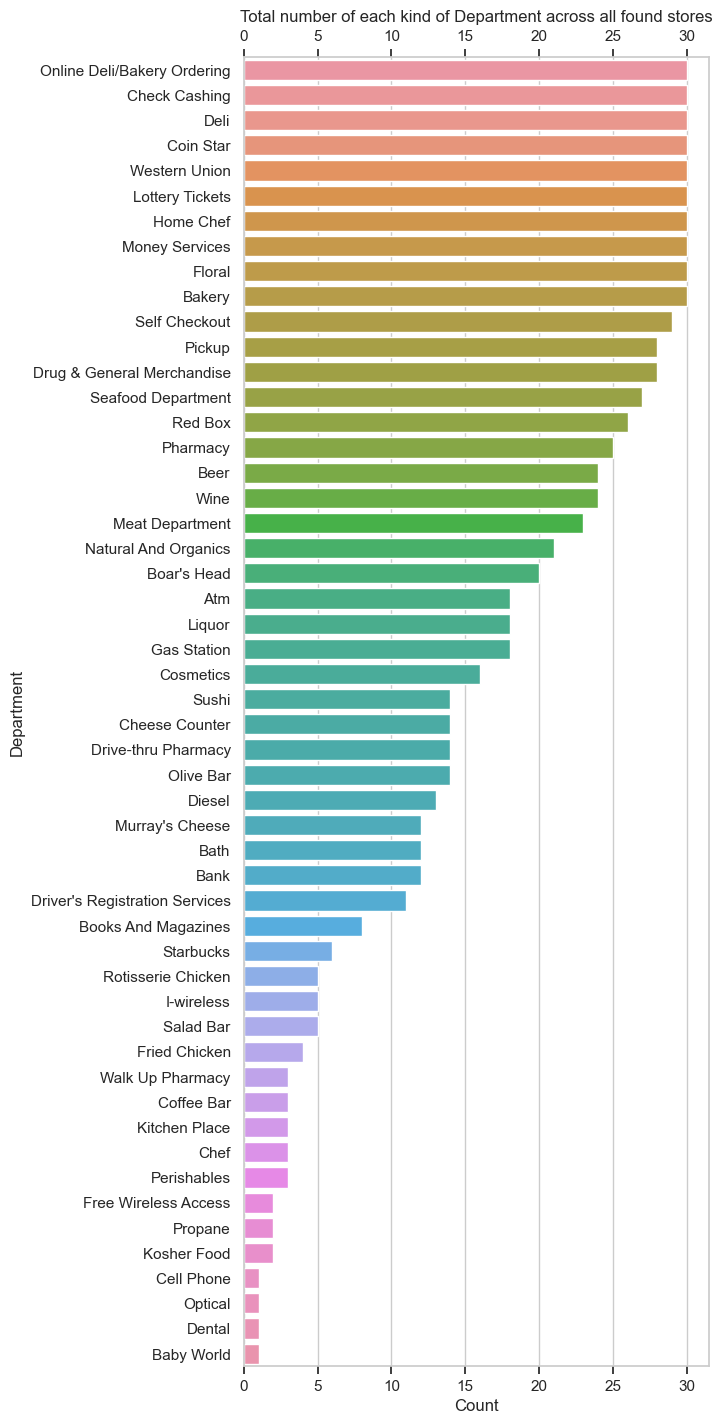

In [9]:
#Plot a frequency plot
plt.figure(figsize=(6,17))
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=df_dep_filtered,y='Department',x='Count')
ax.tick_params(top=True, labeltop=True, bottom=True, labelbottom=True)
ax.set_title('Total number of each kind of Department across all found stores')

From the plot we observed that the bakery goods are almost available in all the 30 stores compared to other departments. Goods for infants are only available in fewer stores

In [10]:
# How many matches for "Chocolate Milk" does each nearby store have?
product_count = []
store_name = []

for store in df_loc['locationId'].values:
    df_prod = utils.extract_product_data("https://api.kroger.com/v1/products", res_dict, 'Mobile', 30, 'ais',store)
    store_name.append(df_loc[df_loc['locationId']==store]['name'].values[0])
    product_count.append(df_prod.shape[0])


In [11]:
df_loc[df_loc['locationId']=='01800365']['name'].values[0]

'Kroger - Washtenaw'

In [12]:
df_prod_stores = pd.DataFrame(list(zip(store_name,product_count)),columns = ['Store_Name','Product_Quantity'])

In [13]:
df_prod_stores

,Store_Name,Product_Quantity
0,Kroger - Ypsilanti,6
1,Kroger - Whittaker,4
2,Kroger - Carpenter Packard,7
3,Kroger - Michigan Canton,4
4,Kroger - Washtenaw,3
5,Kroger - Canton,2
6,Kroger - Plymouth Nixon,1
7,Kroger - Plymouth,2
8,Kroger - Westgate,3
9,Kroger - Westland,7


### The histogram plot talks about the availability of mobile phones at each store


<Figure size 800x1900 with 0 Axes>

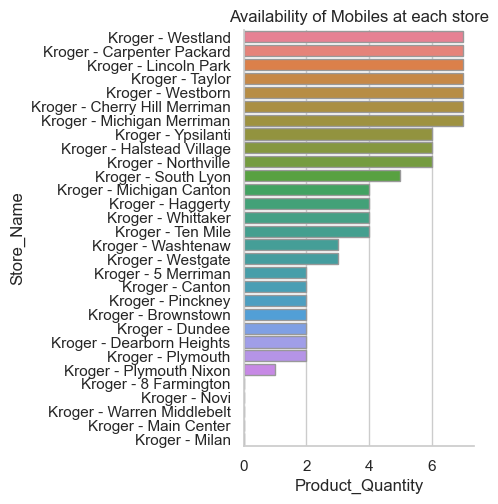

In [14]:
plt.figure(figsize=(8,19))

ax1 = sns.catplot(
    data=df_prod_stores.sort_values(by='Product_Quantity',ascending=False), y="Store_Name", x='Product_Quantity', kind='bar',
    palette="husl", edgecolor=".6",
)
plt.title('Availability of Mobiles at each store');



As we can see the Krogers store at Michigan Merriman has the highest handiness and the Krogers store at Plymouth Nixon has the lowest. Whereas, amongst the 30 stores 5 of them has 0 stock.

**Installing completejourney-py package to get the transactions, campaigns, promotions, product details of kroger data for 2500 households**

**This dataset is from 81.54**

In [86]:


!pip install completejourney-py

In [17]:
from completejourney_py import get_data


transactions = get_data()["transactions"]
promotions = get_data()["promotions"]
products = get_data()['products']
demographics = get_data()['demographics']
campaigns = get_data()['campaigns']
campaigns_desc = get_data()['campaign_descriptions']
coupons = get_data()['coupons']
coupon_redemptions = get_data()['coupon_redemptions']



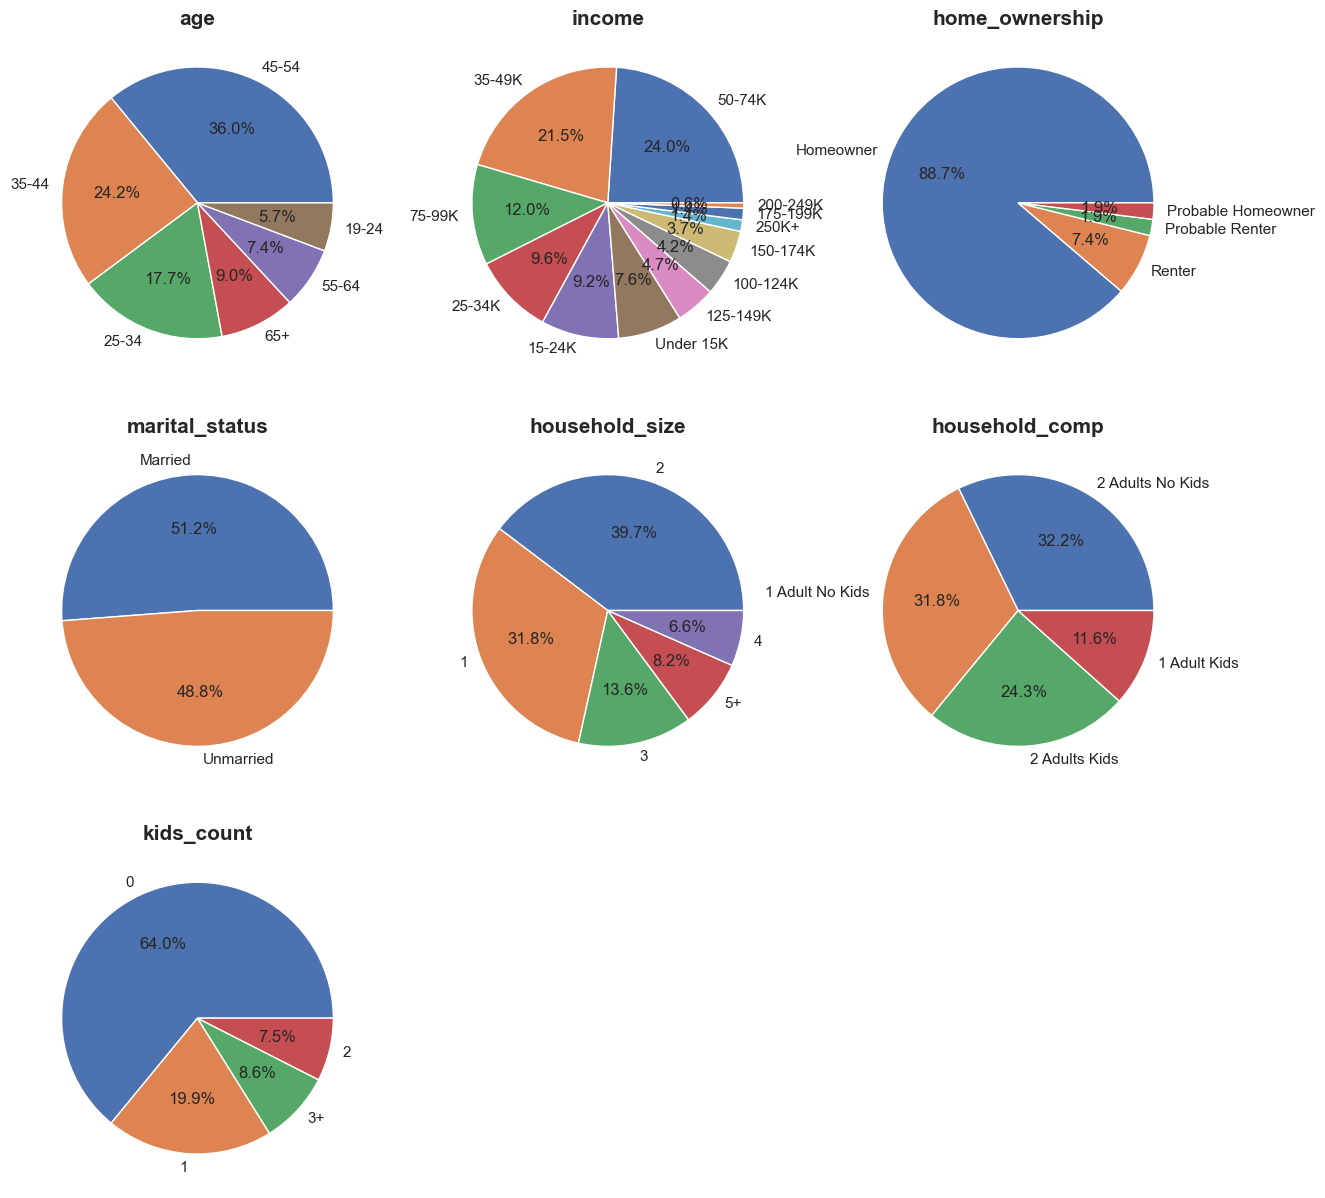

In [38]:
def pie_categorical(data):
    #function to plot the histogram of categorical variables in pie graph
    features = data.columns
    #plot pie charts of categorical variables
    fig_pie_cat = plt.figure(figsize=(15,15))
    count = 1
    #calculate dynamic numbers of subplot rows and columns
    cols = int(np.ceil(np.sqrt(len(features))))
    rows = int(np.ceil(len(features)/cols))
    for i in features:
        ax = fig_pie_cat.add_subplot(rows,cols,count)
        data[i].value_counts().plot(kind="pie",autopct="%.1f%%",ax=ax)
        plt.ylabel("")
        plt.title(i,fontweight="bold",fontsize=15)
        count += 1


pie_categorical(demographics.drop("household_id",axis=1))

**Findings:**

* Majority of the customers age in between **35-54** (~60%)
* Singles are almost **one third** of the total households
* Almost **half** of the population have a yearly salary between **$35-74K**
* Majority of the customers own a house (**88%**)
* Majority of the customers does not have a child (**~64%**)

In [19]:
transactions['Year'] = transactions['transaction_timestamp'].dt.year
transactions['Month'] = transactions['transaction_timestamp'].dt.month

transactions_products = pd.merge(transactions, products, on='product_id',how='inner')
transactions_products_demographics = pd.merge(transactions_products, demographics, on='household_id',how='inner')

transactions_products_demographics= transactions_products_demographics[(transactions_products_demographics['Year'] == 2017)]

income_expenditure_plot=transactions_products_demographics.groupby(['household_id']).agg({
    'income': pd.Series.unique,
    'quantity': sum,
    'sales_value' : sum
})
#display(income_expenditure_plot)
income_expenditure_plot['income']=income_expenditure_plot['income'].astype(str)

# ggplot(income_expenditure_plot, aes(y = "sales_value", x = "quantity", color = "income")) + geom_point(alpha = 0.5, position = "jitter") + geom_smooth(method = "lm", se = False) + labs(x = "Total Units", y = "Total Spending of individual households", title = "Income wise Household Spending - 2017")



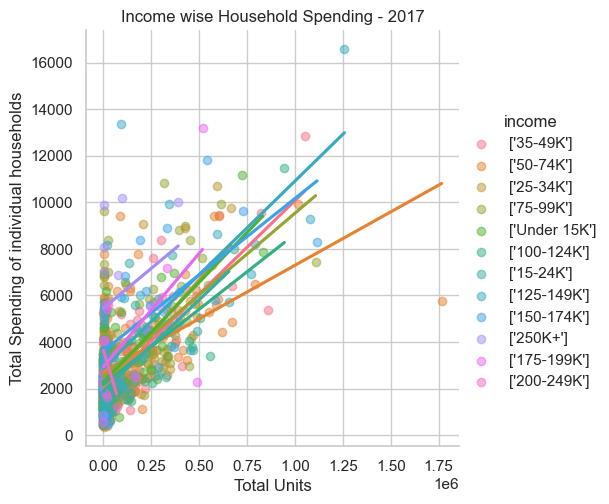

In [20]:
# Create a scatter plot with multiple regression lines
sns.lmplot(data=income_expenditure_plot, x="quantity", y="sales_value", hue="income", scatter=True, ci=None, scatter_kws={"alpha": 0.5})
plt.xlabel("Total Units")
plt.ylabel("Total Spending of individual households")
plt.title("Income wise Household Spending - 2017")
plt.show()


Based on the scatter plot, **the total household spending generally increases as the income increases**, from about $3,000 for households with less than $15,000 in income to $140,000 for households with more than $250,000 in income.

However, there is a lot of variation in spending within each income bracket, with some households spending much more or less than the average. For example, in the $50,000-$74,000 income bracket, some households spend as little as $20,000 while others spend as much as $140,000.

This variation in spending is likely due to a number of factors, such as the size of the household, the age and health of family members, the cost of living in the area, and the household's financial priorities. 

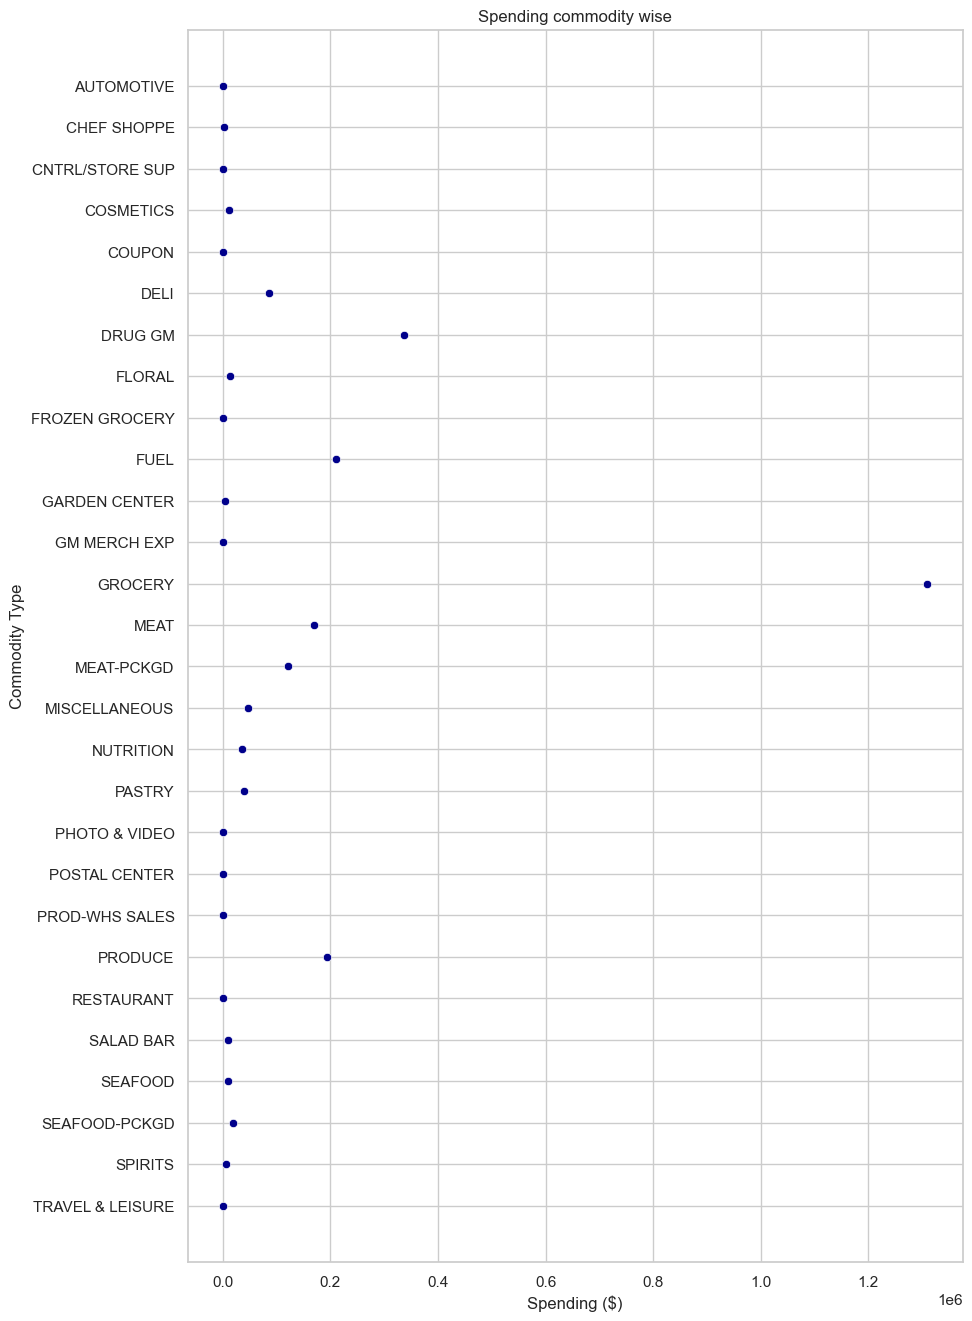

In [21]:
commodity_expenditure=transactions_products_demographics.groupby(['department'],as_index=False).agg({
    'sales_value' : sum
    })
plt.figure(figsize=(10,16))
sns.scatterplot(data=commodity_expenditure, x="sales_value", y="department", color='darkblue')
plt.xlabel("Spending ($)")
plt.ylabel("Commodity Type")
plt.title("Spending commodity wise")
plt.show()

The plot shows that there is a lot of variation in spending within each commodity type. For example, people spend much more money on groceries than others.

**People spent more on fresh meat compared to packed-meat.** We can conclude that people were willing to pay more for fresh meat than for packaged meat.

The plot shows that people tend to spend a significant amount of money on food, transportation, and vehicles. 


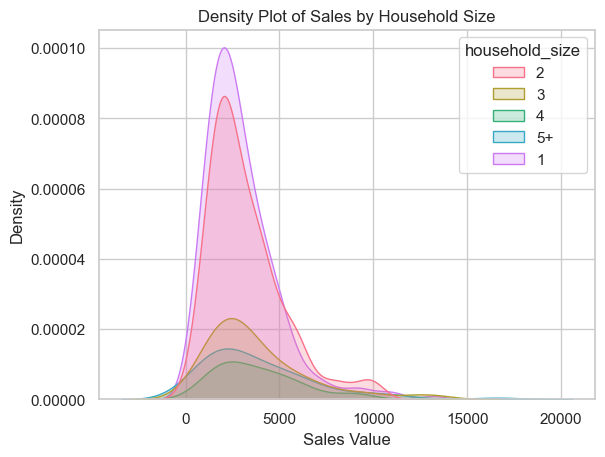

In [22]:
sales_household_size=transactions_products_demographics.groupby(['marital_status','household_size','household_id'],as_index=False).agg({
    'sales_value' : sum
    })

#sns.distplot(data=sales_household_size, x='sales_value', hue='household_size', element='step', fill=True, alpha=0.5, common_norm=False, palette='husl')

sns.kdeplot(data=sales_household_size,x='sales_value',hue='household_size',fill=True,palette='husl')
plt.xlabel("Sales Value")
plt.ylabel("Density")
plt.title("Density Plot of Sales by Household Size")
plt.show()

The plot shows that the most common household size is 2 people, with a density of 0.00010 sales per household size. The density of sales decreases as the household size increases, with the lowest density of sales (0.00002 sales per household size) for households with 5 or more people.

The plot also shows that there is a lot of variation in sales within each household size. For example, there are some households with 2 people that have sales of over $20,000, while there are other households with 2 people that have sales of less than $10,000.

The most common household size is 2 people and sales vary a lot within each household size.

In [23]:
campaigns_desc.head()

,campaign_id,campaign_type,start_date,end_date
0,1,Type B,2017-03-03,2017-04-09
1,2,Type B,2017-03-08,2017-04-09
2,3,Type C,2017-03-13,2017-05-08
3,4,Type B,2017-03-29,2017-04-30
4,5,Type B,2017-04-03,2017-05-07


In [24]:
from datetime import date

campaigns_desc['Duration'] = (campaigns_desc['end_date'] - campaigns_desc['start_date']).dt.days 


Text(0.5, 1.0, 'Duration of Campaigns lasted')

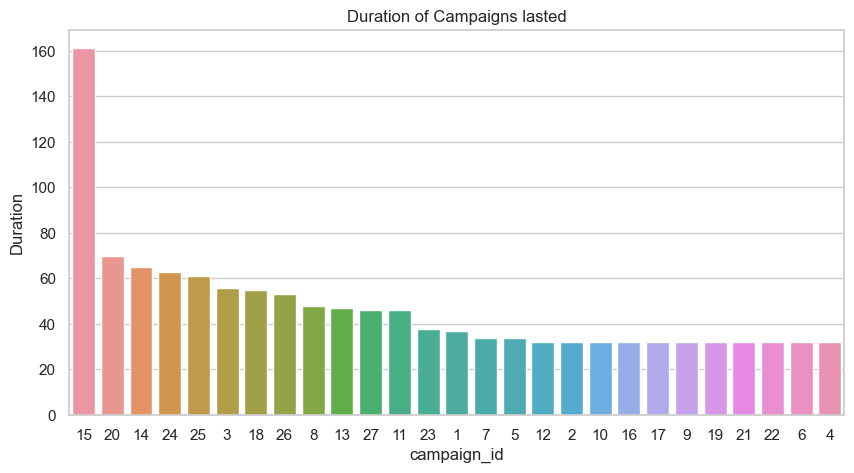

In [25]:
fig = plt.figure(figsize=(10,5))
ax2 = sns.barplot(x="campaign_id",y="Duration",data=campaigns_desc,orient="v",order=campaigns_desc.sort_values('Duration',ascending=False).campaign_id)

ax2.set_title('Duration of Campaigns lasted')


The household with the lowest spending, spent approximately $5,000 and the household with the highest spending has spent nearly $25,000 among the top 20 households and the median spending amount is around $15,000.

In [26]:
campaigns_desc[['Duration']].describe()

,Duration
count,27.000000
mean,46.888889
std,25.927908
min,32.000000
25%,32.000000
50%,37.000000
75%,54.000000
max,161.000000


In [27]:
total_hshlds = len(transactions.household_id.unique())
#Total Households



In [28]:
len(campaigns.household_id.unique())

1559

Text(0.5, 1.0, 'Analysis of Campaigns reached to households')

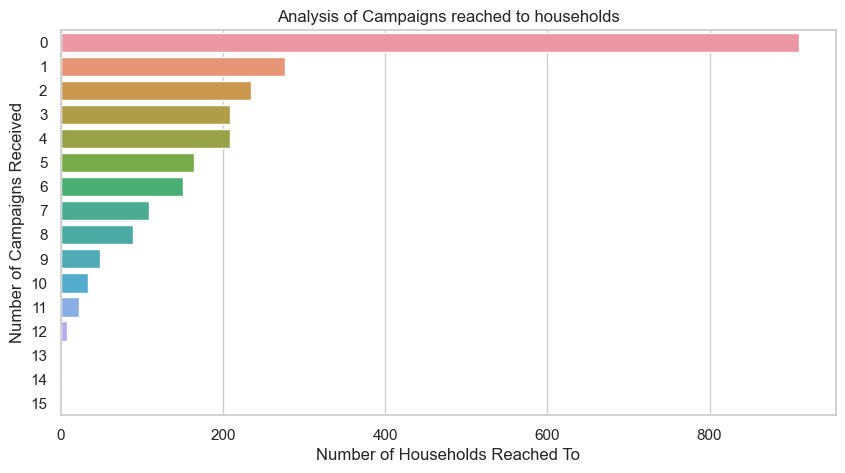

In [29]:
no_of_received_campaigns_per_house = campaigns.household_id.value_counts()
no_of_received_campaigns = no_of_received_campaigns_per_house.value_counts()
no_of_received_campaigns[0] = total_hshlds-len(no_of_received_campaigns_per_house)
no_of_received_campaigns = pd.DataFrame(list(zip(no_of_received_campaigns.index,no_of_received_campaigns)),columns=["Number of Campaigns Received","Number of Households Reached To"]).sort_values(by="Number of Campaigns Received",ascending=True)
plt.figure(figsize=(10,5))
ax3 = sns.barplot(y="Number of Campaigns Received",x="Number of Households Reached To",data=no_of_received_campaigns,orient="h",order=no_of_received_campaigns["Number of Campaigns Received"])
ax3.set_title('Analysis of Campaigns reached to households')


The campaign with the highest reach has an ID of 1 and reached 250 households.

The campaign with the lowest reach has an ID of 12 and reached 20 households.

The median reach is 180 households.

There is a lot of variation in reach between campaigns, with some campaigns reaching many more households than others.

Text(0.5, 1.0, 'Analysis of most frequent campaigns')

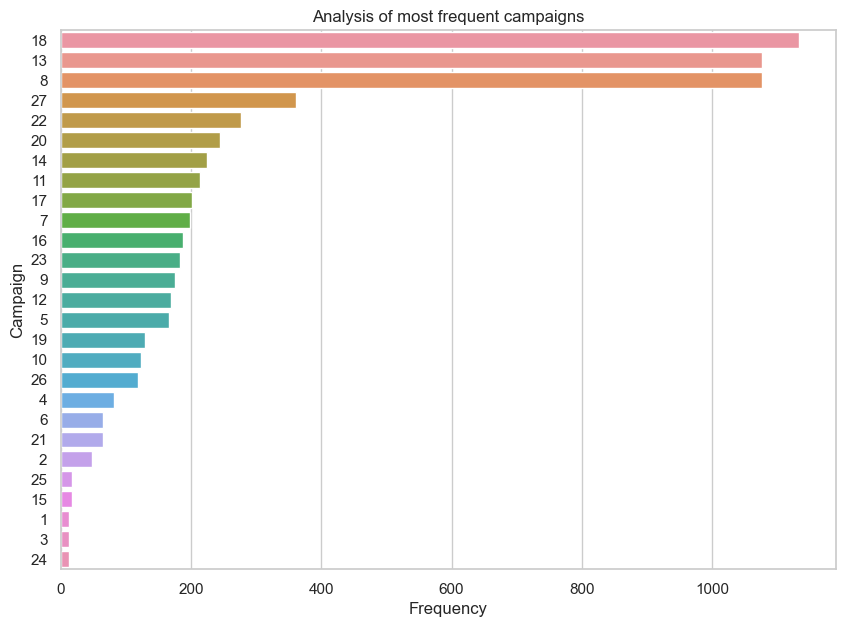

In [30]:
freq_campaigns = pd.DataFrame(list(zip(campaigns.campaign_id.value_counts().index, campaigns.campaign_id.value_counts())),columns=["Campaign","Frequency"])
fig = plt.figure(figsize=(10,7))
ax4 = sns.barplot(y="Campaign",x="Frequency",data = freq_campaigns,orient="h",order=freq_campaigns.Campaign)
ax4.set_title('Analysis of most frequent campaigns')


The most frequent campaign is campaign ID 18, which occurred 1000 times.

The least frequent campaign is campaign ID 24, which occurred 10 times.

The median frequency is 180 occurrences.

In [32]:
#Understanding the coupon redemption data to know which campaign was more effective

len(coupon_redemptions.household_id.unique())



410

In [54]:
coupon_redemptions.head()

,household_id,coupon_upc,campaign_id,redemption_date
0,1029,51380041013,26,2017-01-01
1,1029,51380041313,26,2017-01-01
2,165,53377610033,26,2017-01-03
3,712,51380041013,26,2017-01-07
4,712,54300016033,26,2017-01-07


### **Understanding the number of redeems per campaign**

Text(0.5, 1.0, 'Number of redeems per campaign')

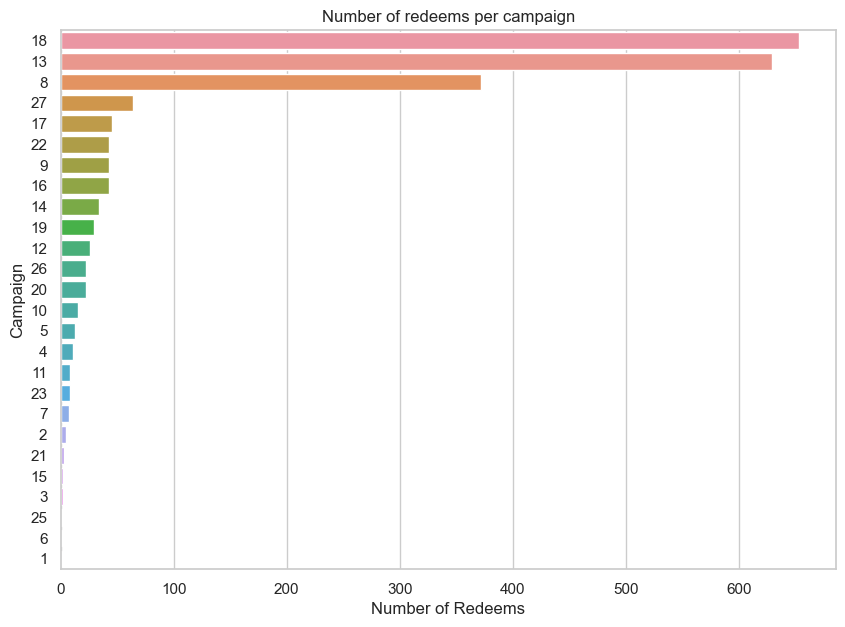

In [33]:
# Understanding the number of redeems per campaign

redeem_frequency = pd.DataFrame(list(zip(coupon_redemptions.campaign_id.value_counts().index, coupon_redemptions.campaign_id.value_counts())),columns=["Campaign","Number of Redeems"])
fig = plt.figure(figsize=(10,7))
ax5 = sns.barplot(y="Campaign",x="Number of Redeems",data = redeem_frequency,orient="h",order=redeem_frequency.Campaign)

ax5.set_title('Number of redeems per campaign')

From the graph below, campaign ID 18, which is a Type A campaign has lasted for 55 days.

There are 600 coupons redeemed in those 55 days which has been recorded as the hightest.
 
The campaign ID 21, which is a Type B campaign that lasted for a month recorded the lowest redeemptions almost to 0.

**Based on these results, campaign organisers did well by promoting the right campaigns (13 and 18) more frequently.**

C:\Users\srira\AppData\Local\Temp\ipykernel_36076\4022206094.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sales_per_store = transactions.groupby("store_id").sum()["sales_value"].sort_values(ascending=False)


Text(0.5, 1.0, 'Top 20 stores based on total purchases')

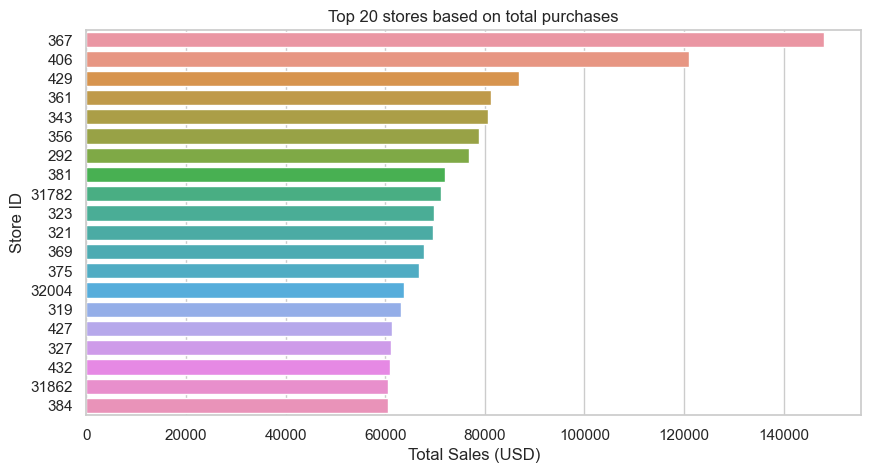

In [ ]:
# Top 20 stores based on total sales

sales_per_store = transactions.groupby("store_id").sum()["sales_value"].sort_values(ascending=False)
sales_per_store = pd.DataFrame(list(zip(sales_per_store.index,sales_per_store)),columns=["Store ID","Total Sales (USD)"])
fig_store = plt.figure(figsize=(10,5))
sns.barplot(y="Store ID",x="Total Sales (USD)",data = sales_per_store[:20],order=sales_per_store[:20]["Store ID"],orient="h")

plt.title('Top 20 stores based on total purchases')

**The graph shows the top 20 Kroger stores based on the total purchases in the United States** 

The store with ID 367 has generated the highest revenue of over $140000 beating all the other stores in the USA, whereas the store with ID 384 has made the lowest revenue of $60000.

This graph clearly shows that a small number of stores account for a large share of total purchases in the United States

C:\Users\srira\AppData\Local\Temp\ipykernel_36076\1491167046.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  purc_per_cust = transactions.groupby("household_id").sum()["sales_value"].sort_values(ascending=False)


Text(0.5, 1.0, 'Top 20 households based on total purchases')

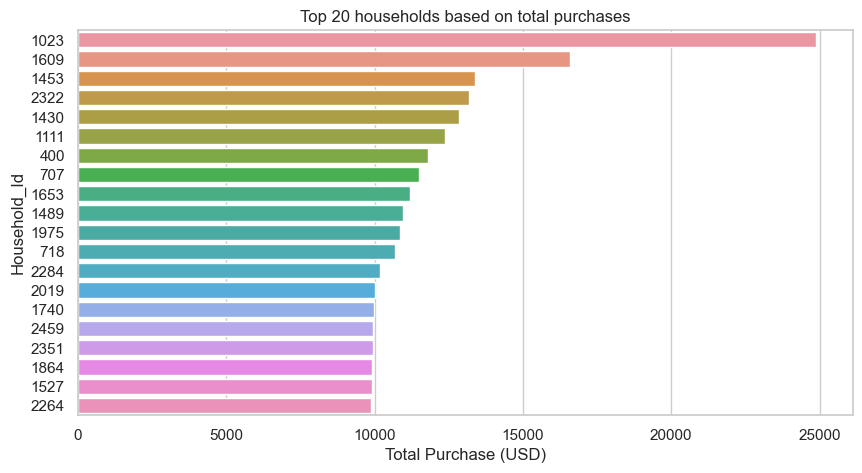

In [ ]:
# Top 20 households based on total purchase amount

purc_per_cust = transactions.groupby("household_id").sum()["sales_value"].sort_values(ascending=False)
purc_per_cust = pd.DataFrame(list(zip(purc_per_cust.index,purc_per_cust)),columns=["Household_Id","Total Purchase (USD)"])
fig_store = plt.figure(figsize=(10,5))
sns.barplot(y="Household_Id",x="Total Purchase (USD)",data = purc_per_cust[:20],order=purc_per_cust[:20]["Household_Id"],orient="h")

plt.title('Top 20 households based on total purchases')

**The plot shows the top 20 households based on total purchases in Kroger stores in the United States**

The top 20 households have a total of a minimum of over $100,000 in purchases. 

Household ID 1023 has the highest total purchase of over $25,000 while household ID 2264 made the least purchase of over $10000. 

This graph clearly shows that a small number of households account for a large share of total purchases in the United States. 

This graph could be used by businesses to target their marketing and sales efforts. For example, a business could focus on marketing to the top 20 households to increase their sales.

### **Conclusion**

Based on the above insights:

1. **Income and Household Spending**:
   - Household spending generally increases with income, but there is substantial spending variation within each income bracket.
   - Factors like household size, demographics, cost of living, and financial priorities influence this spending variation.


2. **Commodity Type and Spending**:
   - Significant spending variation exists within each commodity type.
   - People allocate more budget to groceries, and they are willing to spend more on fresh meat than packaged meat.


3. **Major Spending Categories**:
   - Food, transportation, and vehicles are prominent categories where people tend to spend a significant amount of money.


4. **Household Size and Sales**:
   - The most common household size is 2 people, with varying sales within each size category.
   - Sales per household decrease as the household size increases.


5. **Top Spending Households**:
   - The top 20 households exhibit a wide spending range, from approximately $5,000 to nearly $25,000.
   - These households play a significant role in total purchases, and businesses may target them for marketing and sales efforts.
   

6. **Top Kroger Stores**:
   - A small number of Kroger stores generate a substantial share of total purchases.
   - Store 367 stands out with the highest revenue, surpassing all other stores in the USA.

These insights highlight the importance of understanding spending variations within income, commodity types, and household sizes, as well as the significance of targeting high-spending households and stores for effective marketing and sales strategies.